# Lab: Titanic Survival Exploration with Decision Trees

## Getting Started
In this lab, you will see how decision trees work by implementing a decision tree in sklearn.

We'll start by loading the dataset and displaying some of its rows.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Set a random seed
import random
random.seed(42)

# Load the dataset
in_file = 'D:/DeepLearning/spaceship-titanic/train.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [2]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Transported']
features_raw = full_data.drop('Transported', axis = 1)

# Show the new dataset with 'Survived' removed
display(features_raw.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

## Preprocessing the data

Now, let's do some data preprocessing. First, we'll one-hot encode the features.

In [3]:
features = pd.get_dummies(features_raw)

And now we'll fill in any blanks with zeroes.

In [4]:
features = features.fillna(0.0)
display(features.head())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_0001_01,PassengerId_0002_01,PassengerId_0003_01,PassengerId_0003_02,...,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Flesping,Name_Zubeneb Pasharne
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## (TODO) Training the model

Now we're ready to train a model in sklearn. First, let's split the data into training and testing sets. Then we'll train the model on the training set.

In [5]:
outcomes = outcomes.astype('int')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [7]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Testing the model
Now, let's see how our model does, let's calculate the accuracy over both the training and the testing set.

In [8]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.7556066705002875


# Exerise: Improving the model

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now it's your turn to shine! Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth`
- `min_samples_leaf`
- `min_samples_split`

You can use your intuition, trial and error, or even better, feel free to use Grid Search!

**Challenge:** Try to get to 85% accuracy on the testing set. If you'd like a hint, take a look at the solutions notebook in this same folder.

In [9]:
# Training the model
model1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model1.fit(X_train, y_train)

# Making predictions
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.7890422778257118
The test accuracy is 0.7705577918343876


In [10]:
def Normalize(data):
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    data -= mean
    processed_std = std.replace(0,1)
    data /= processed_std
    return data

for _ in [X_train, X_test]:
    Normalize(_)

import numpy as np
X_train, X_test = np.array(X_train), np.array(X_test)

In [58]:
from keras import models, layers, optimizers, regularizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu',
                       input_shape=(X_train.shape[1],),
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu', 
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu',
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', 
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 256)               6078208   
_________________________________________________________________
batch_normalization_32 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_33 (Batc (None, 128)               512       
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
__________

In [59]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=[X_test, y_test])

Train on 6954 samples, validate on 1739 samples
Epoch 1/50
6954/6954 [==============================] - 36s - loss: 1.7335 - acc: 0.4925 - val_loss: 1.1455 - val_acc: 0.5411
Epoch 2/50
6954/6954 [==============================] - 33s - loss: 1.6080 - acc: 0.5078 - val_loss: 1.0984 - val_acc: 0.5239
Epoch 3/50
6954/6954 [==============================] - 33s - loss: 1.4931 - acc: 0.5022 - val_loss: 1.0537 - val_acc: 0.5578
Epoch 4/50
6954/6954 [==============================] - 36s - loss: 1.4266 - acc: 0.5102 - val_loss: 1.0148 - val_acc: 0.5112
Epoch 5/50
6954/6954 [==============================] - 32s - loss: 1.3294 - acc: 0.5201 - val_loss: 0.9830 - val_acc: 0.5083
Epoch 6/50
6954/6954 [==============================] - 33s - loss: 1.2828 - acc: 0.5260 - val_loss: 0.9500 - val_acc: 0.5124
Epoch 7/50
6954/6954 [==============================] - 32s - loss: 1.2317 - acc: 0.5252 - val_loss: 0.9267 - val_acc: 0.5164
Epoch 8/50
6954/6954 [==============================] - 32s - loss: 1.

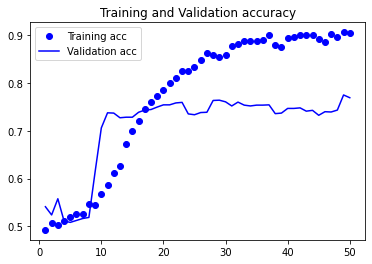

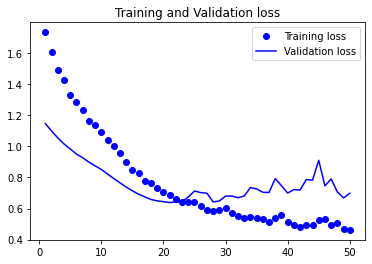

In [60]:
import matplotlib.pyplot as plt
def plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and Validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

plot(history)